In [12]:

import pandas as pd
import numpy as np


file_path = "flights_delay.csv"
df = pd.read_csv(file_path)
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

# Filter for Aug 2022 to Aug 2023
start_date = "2022-08-01"
end_date   = "2023-08-31"
#df = df[(df["FL_DATE"] >= start_date) & (df["FL_DATE"] <= end_date)]
df = df[(df["CANCELLED"] == 0) & (df["DIVERTED"] == 0)].reset_index(drop = True)
df["WeekdayName"] = df["FL_DATE"].dt.day_name()
df = df.drop(columns=[
                        "DOT_CODE", "AIRLINE_DOT", "AIRLINE_CODE","ORIGIN",
                        "DEST","CRS_DEP_TIME", "DEP_TIME", "CRS_ARR_TIME","ARR_TIME","WHEELS_OFF","WHEELS_ON",
                         "TAXI_OUT","TAXI_IN","CANCELLED" ,"CANCELLATION_CODE","DIVERTED","ELAPSED_TIME","CRS_ELAPSED_TIME"                
                     ])
df.head()

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN_CITY,DEST_CITY,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,WeekdayName
0,2019-01-09,United Air Lines Inc.,1562,"Fort Lauderdale, FL","Newark, NJ",-4.0,-14.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN,Wednesday
1,2022-11-19,Delta Air Lines Inc.,1149,"Minneapolis, MN","Seattle, WA",-6.0,-5.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN,Saturday
2,2022-07-22,United Air Lines Inc.,459,"Denver, CO","Minneapolis, MN",6.0,0.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN,Friday
3,2023-03-06,Delta Air Lines Inc.,2295,"Minneapolis, MN","San Francisco, CA",-1.0,24.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,Monday
4,2020-02-23,Spirit Air Lines,407,"Orlando, FL","Dallas/Fort Worth, TX",-2.0,-1.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN,Sunday


In [13]:
print(df.info())     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913804 entries, 0 to 2913803
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   FL_DATE                  datetime64[ns]
 1   AIRLINE                  object        
 2   FL_NUMBER                int64         
 3   ORIGIN_CITY              object        
 4   DEST_CITY                object        
 5   DEP_DELAY                float64       
 6   ARR_DELAY                float64       
 7   AIR_TIME                 float64       
 8   DISTANCE                 float64       
 9   DELAY_DUE_CARRIER        float64       
 10  DELAY_DUE_WEATHER        float64       
 11  DELAY_DUE_NAS            float64       
 12  DELAY_DUE_SECURITY       float64       
 13  DELAY_DUE_LATE_AIRCRAFT  float64       
 14  WeekdayName              object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(4)
memory usage: 333.5+ MB
None


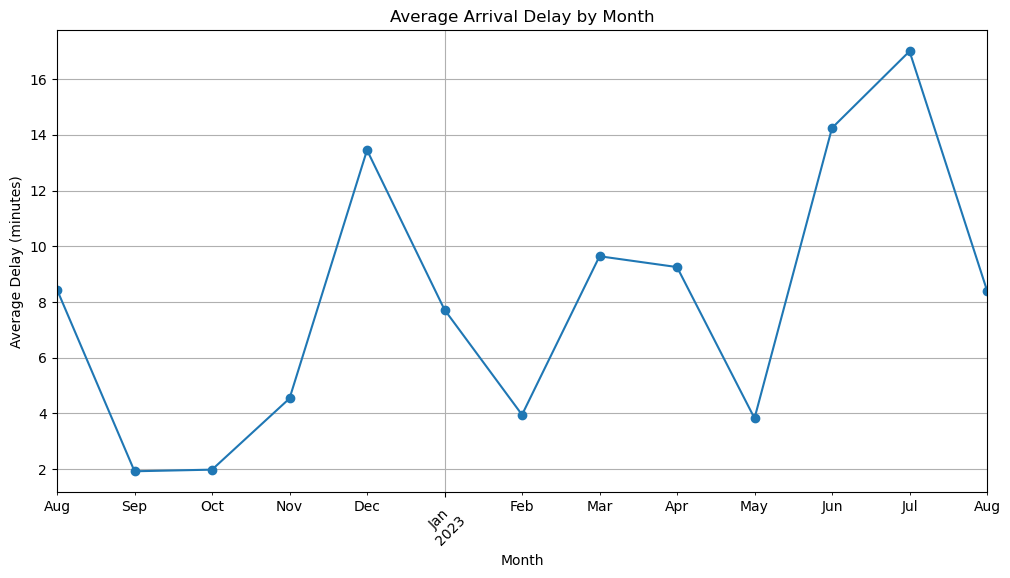

In [3]:
import matplotlib.pyplot as plt

# Group by month and compute average arrival delay
df["Month"] = df["FL_DATE"].dt.to_period("M")   # Year-Month
monthly_delay = df.groupby("Month")["ARR_DELAY"].mean()

# Plot
plt.figure(figsize=(12,6))
monthly_delay.plot(marker="o")
plt.title("Average Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1400x600 with 0 Axes>

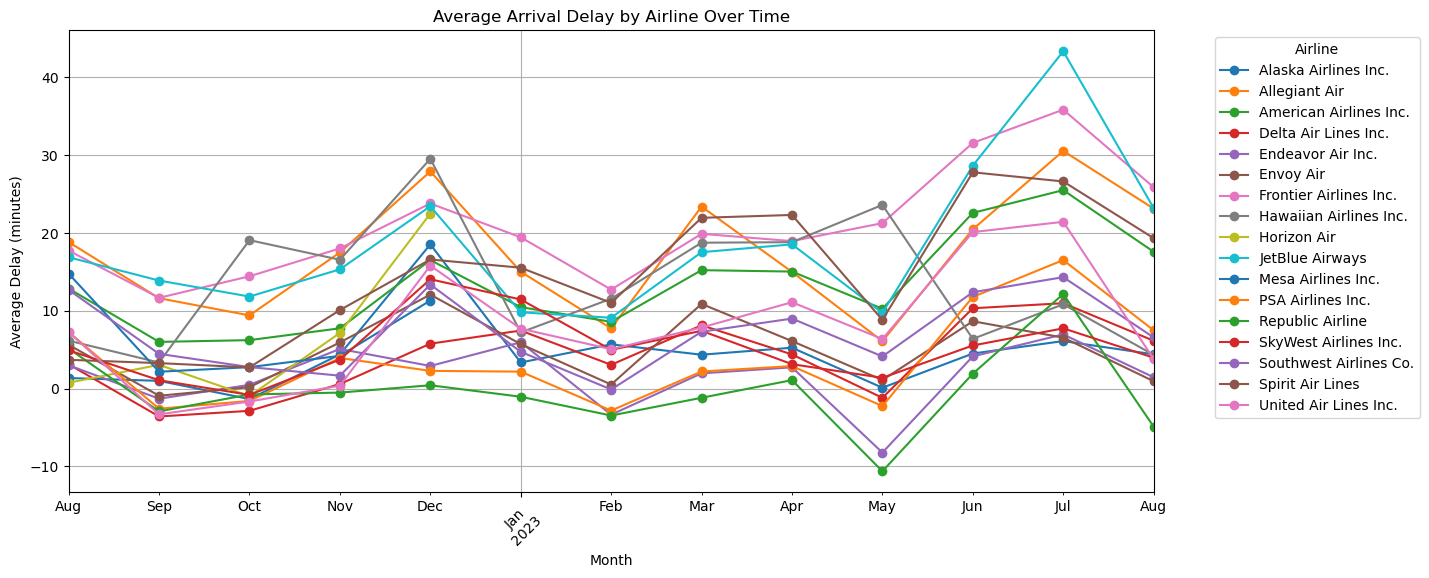

In [4]:
# Group by airline and month
airline_monthly = df.groupby([df["FL_DATE"].dt.to_period("M"), "AIRLINE"])["ARR_DELAY"].mean().unstack()

# Plot
plt.figure(figsize=(14,6))
airline_monthly.plot(marker="o", figsize=(14,6))
plt.title("Average Arrival Delay by Airline Over Time")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.legend(title="Airline", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


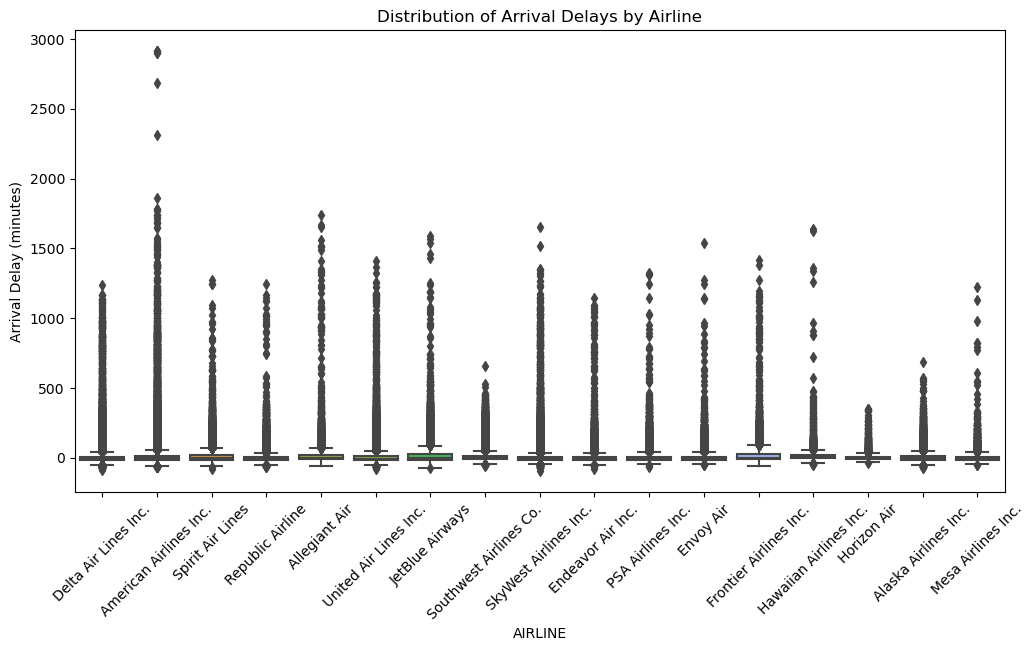

In [5]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x="AIRLINE", y="ARR_DELAY", data=df)
plt.title("Distribution of Arrival Delays by Airline")
plt.xticks(rotation=45)
plt.ylabel("Arrival Delay (minutes)")
plt.show()


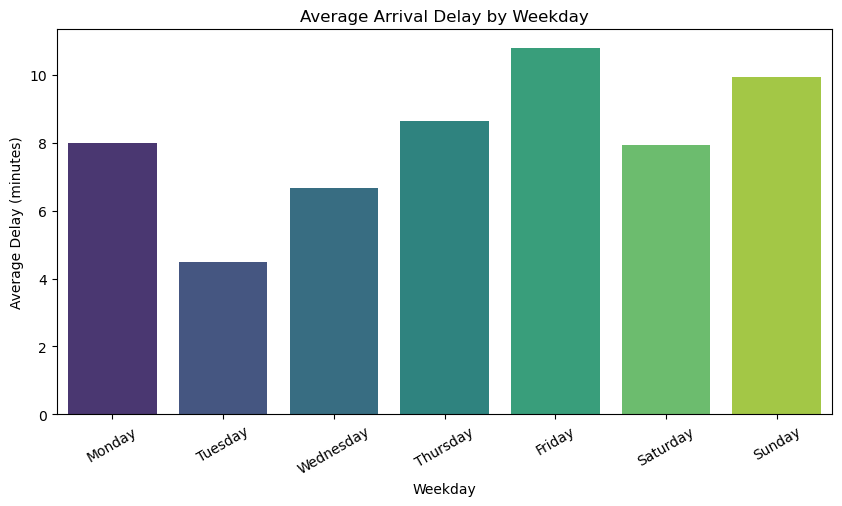

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by weekday (0=Mon, 6=Sun) and compute average delay
weekday_delay = df.groupby("WeekdayName")["ARR_DELAY"].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(10,5))
sns.barplot(x=weekday_delay.index, y=weekday_delay.values, palette="viridis")
plt.title("Average Arrival Delay by Weekday")
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Weekday")
plt.xticks(rotation=30)
plt.show()


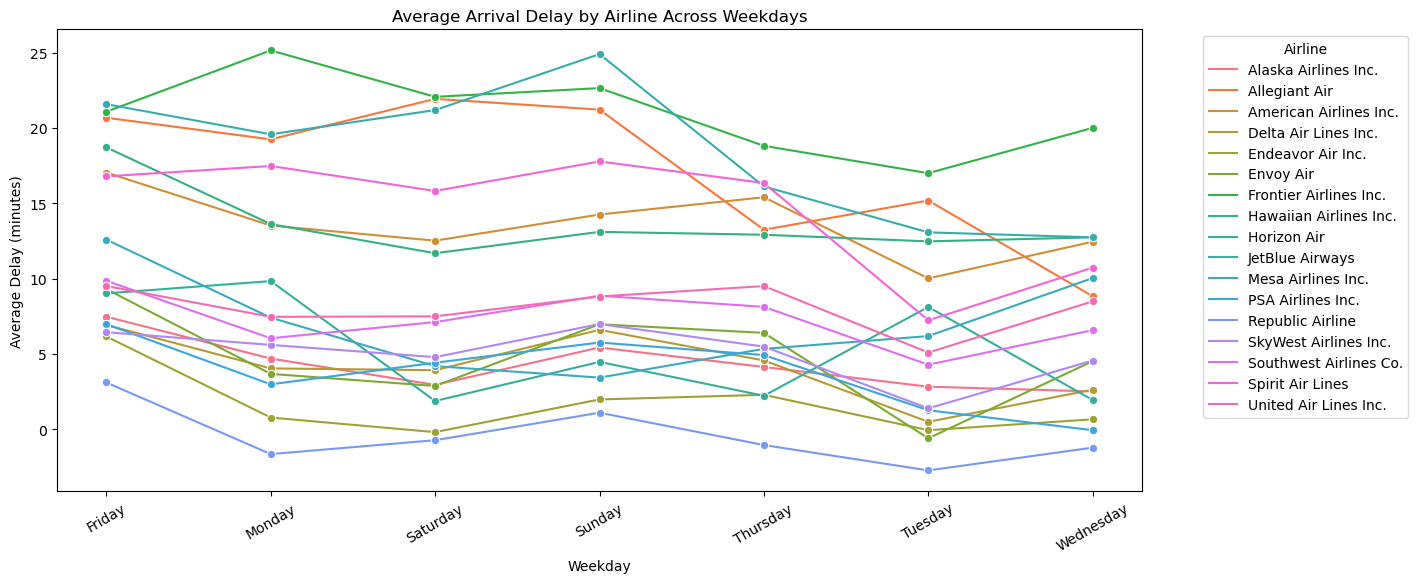

In [7]:
# Group by weekday + airline
weekday_airline = df.groupby(["WeekdayName", "AIRLINE"])["ARR_DELAY"].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=weekday_airline, x="WeekdayName", y="ARR_DELAY", hue="AIRLINE", marker="o")
plt.title("Average Arrival Delay by Airline Across Weekdays")
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Weekday")
plt.xticks(rotation=30)
plt.legend(title="Airline", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [8]:
# List of delay reason columns
delay_cols = ["DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", 
              "DELAY_DUE_NAS", "DELAY_DUE_SECURITY", 
              "DELAY_DUE_LATE_AIRCRAFT"]

# Check missing values before filling
print("Missing values before fill:")
print(df[delay_cols].isna().sum())

# Fill NaN with 0
df[delay_cols] = df[delay_cols].fillna(0)


Missing values before fill:
DELAY_DUE_CARRIER          575117
DELAY_DUE_WEATHER          575117
DELAY_DUE_NAS              575117
DELAY_DUE_SECURITY         575117
DELAY_DUE_LATE_AIRCRAFT    575117
dtype: int64


In [9]:
# Mapping from column names to reason labels
delay_reason_map = {
    "DELAY_DUE_CARRIER": "CARRIER",
    "DELAY_DUE_WEATHER": "WEATHER",
    "DELAY_DUE_NAS": "NAS",
    "DELAY_DUE_SECURITY": "SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT": "LATE_AIRCRAFT"
}

def list_delay_reasons(row):
    reasons = [label for col, label in delay_reason_map.items() if row[col] > 0]
    return ", ".join(reasons) if reasons else "NOT DELAY"

# Apply to dataset
df["DELAY_REASONS"] = df.apply(list_delay_reasons, axis=1)

# Preview
print(df[["ARR_DELAY"] + list(delay_reason_map.keys()) + ["DELAY_REASONS"]].head(10))


   ARR_DELAY  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
0       -5.0                0.0                0.0            0.0   
1       24.0                0.0                0.0           24.0   
2      -29.0                0.0                0.0            0.0   
3      -11.0                0.0                0.0            0.0   
4      -30.0                0.0                0.0            0.0   
5        6.0                0.0                0.0            0.0   
6     1124.0                0.0                0.0         1124.0   
7        2.0                0.0                0.0            0.0   
8       -2.0                0.0                0.0            0.0   
9      -13.0                0.0                0.0            0.0   

   DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT DELAY_REASONS  
0                 0.0                      0.0     NOT DELAY  
1                 0.0                      0.0           NAS  
2                 0.0                      0.0     

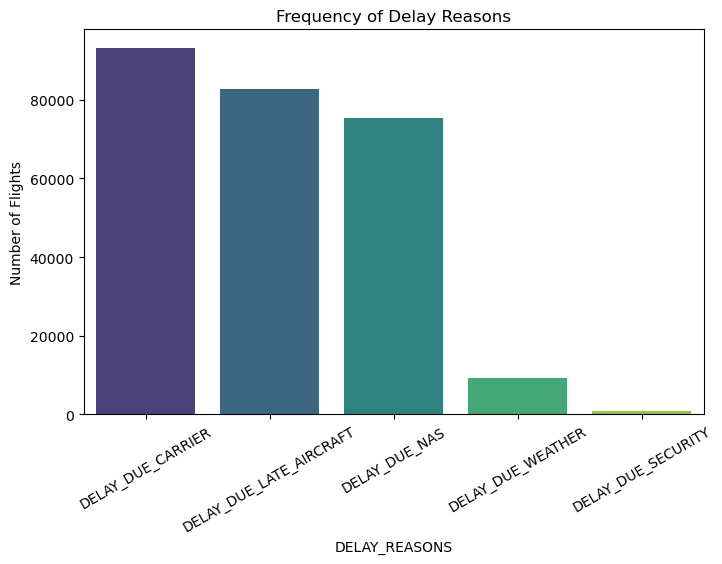

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Delay columns
delay_cols = ["DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", 
              "DELAY_DUE_NAS", "DELAY_DUE_SECURITY", 
              "DELAY_DUE_LATE_AIRCRAFT"]

# Count frequency (number of flights where reason > 0)
reason_counts = (df[delay_cols] > 0).sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=reason_counts.index, y=reason_counts.values, palette="viridis")
plt.title("Frequency of Delay Reasons")
plt.xlabel("DELAY_REASONS")
plt.ylabel("Number of Flights")
plt.xticks(rotation=30)
plt.show()


In [14]:
df.to_csv("data_full.csv", index=False, encoding="utf-8-sig")